In [2]:
import cdt
import networkx as nx
import numpy as np
import pandas as pd

import sys
sys.path.append("..")

from notears.notears.notears import utils
from notears.notears.notears import linear
from notears.notears.notears import nonlinear

import helper.helper as h

from cdt.metrics import SHD

Detecting 1 CUDA device(s).


In [96]:
T, p = 20, 10
data = np.random.rand(T, p)
df = pd.DataFrame(data)

[[0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 0 0]
 [1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0]
 [1 1 0 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 1 0 0 0 0]
 [1 1 1 0 0 0 1 1 0 0 1]
 [1 1 1 0 1 1 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 1 1 1 1 1 0]]


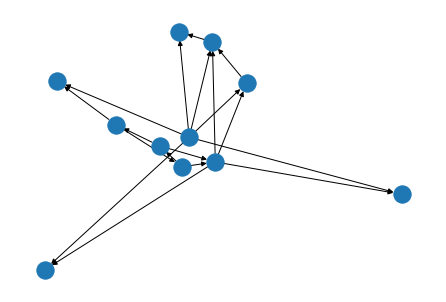

In [3]:
data, graph = cdt.data.load_dataset('sachs')
print(nx.adjacency_matrix(graph).todense())
B_true = nx.adjacency_matrix(graph).todense()
nx.draw(graph)
model = cdt.causality.graph.GES()
output_graph = model.predict(data)
print(nx.adjacency_matrix(output_graph).todense())

In [98]:
print(nx.adjacency_matrix(graph).todense())

[[0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 0 0]
 [1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [99]:
print(h.is_dag(nx.adjacency_matrix(graph).todense()))

False


In [100]:
from cdt.metrics import SHD
scores = SHD(graph, output_graph)
print(scores)

44


In [11]:
utils.count_accuracy(nx.adjacency_matrix(graph).todense(), nx.adjacency_matrix(output_graph).todense())

ValueError: B_est should be a DAG

In [4]:
p, num_edges = 10,  45

# generate X, Psi
B_true = utils.simulate_dag(p, num_edges, 'ER')
W_true = utils.simulate_parameter(B_true)
X = utils.simulate_linear_sem(W_true, 1000, 'gauss')

W, h_val = linear.notears_linear(X, lambda1 = 0.0, loss_type = "l2")

utils.count_accuracy(B_true, W != 0)

h: 2.0239365738916604e-09.
rho: 100000000000.0.
loss: (5.0896404529428425, array([ 1.24954779e-02,  1.08583583e-02,  3.87923794e-02, -3.93321444e-04,
       -1.10577864e-02, -2.58115638e-03,  4.61536126e-04, -4.47944347e-03,
       -1.21437219e-03,  1.41760006e-02,  4.33232510e-04,  2.05824392e-02,
        2.13788276e-02, -2.01831979e-03, -3.04762124e-03, -4.57649596e-03,
       -7.84633581e-05, -4.80979705e-03, -4.37441602e-03,  2.55924236e-03,
       -4.88729929e-04, -9.42890743e-04,  1.98369975e-02, -5.77791817e-04,
       -8.42504639e-05, -3.27863408e-03,  1.32417903e-03, -2.78222235e-03,
       -6.50896008e-04,  6.84966719e-04,  2.62573357e-02,  1.45650842e-01,
        4.19700037e-01,  1.86365950e-02,  1.43950526e-01,  3.65828094e-02,
       -1.99549272e-02,  7.77437450e-03, -4.67995928e-03, -1.03843953e-02,
       -1.45298110e-03,  1.47335326e-02,  4.01222143e-02, -3.26643126e-03,
        3.07962385e-02, -6.18444612e-03,  1.72417819e-03, -1.05682611e-02,
       -7.35348360e-03, -

{'fdr': 0.046511627906976744,
 'tpr': 0.9111111111111111,
 'fpr': 2.0,
 'shd': 4,
 'nnz': 43}

In [102]:
print(B_true)

model = cdt.causality.graph.GES()
output_graph = model.predict(pd.DataFrame(X))
print(nx.adjacency_matrix(output_graph).todense())
utils.count_accuracy(B_true, transform_matrix(np.array(nx.adjacency_matrix(output_graph).todense()), B_true))

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]
[[0 1 0 1 1]
 [0 0 0 0 0]
 [0 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


{'fdr': 0.3333333333333333, 'tpr': 0.6, 'fpr': 3.0, 'shd': 4, 'nnz': 9}

In [161]:
def GES(X, B_true):
    model = cdt.causality.graph.GES()
    output_graph = model.predict(pd.DataFrame(X))
    print(np.array(nx.adjacency_matrix(output_graph).todense()))
    return utils.count_accuracy(B_true, transform_matrix(np.array(nx.adjacency_matrix(output_graph).todense()), B_true))

def NT(X, B_true):
    W, h_val = linear.notears_linear(X.to_numpy(), lambda1 = 0.0, loss_type = "l2", verbose = False)
    return utils.count_accuracy(B_true, W != 0)

data, graph = cdt.data.load_dataset('sachs')
B_true = np.array(nx.adjacency_matrix(graph).todense())
print(GES(data, np.array(B_true)))
print(NT(data, B_true.T))

[[0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0]
 [1 1 0 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 1 0 0 0 0]
 [1 1 1 0 0 0 1 1 0 0 1]
 [1 1 1 0 1 1 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 1 1 1 1 1 0]]
{'fdr': 0.6764705882352942, 'tpr': 0.6111111111111112, 'fpr': 0.6216216216216216, 'shd': 27, 'nnz': 34}
{'fdr': 0.85, 'tpr': 0.16666666666666666, 'fpr': 0.4594594594594595, 'shd': 27, 'nnz': 20}


In [66]:
X = data.to_numpy()
print(np.shape(X))

(7466, 11)


In [68]:
def transform_matrix(B_est, B_true):
    # transform B_est into a directed graph, favourably.
    
    # find all undirected edges
    undirected_edges = np.where(B_est * B_est.T == 1)
    for i, j in zip(undirected_edges[0], undirected_edges[1]):
        # check only one triangle
        if i > j:
            # check if the true matrix has this edge
            if B_true[i][j] == 1:
                # keep this one, remove the other
                B_est[j][i] = 0
            elif B_true[j][i] == 1:
                # keep the other, remove this one
                B_est[i][j] = 0
            else:
                # does not matter, remove the LT one
                B_est[j][i] = 0
                
    return B_est

In [91]:
import torch
torch.set_default_dtype(torch.double)
model = nonlinear.NotearsMLP(dims=[11, 10, 1], bias=True)
W, h_val = nonlinear.notears_nonlinear(model, X)
utils.count_accuracy(B_true, W != 0)

KeyboardInterrupt: 

In [93]:
n, d, s0, graph_type, sem_type = 200, 5, 9, 'ER', 'mim'
B_true = utils.simulate_dag(d, s0, graph_type)

X = utils.simulate_nonlinear_sem(B_true, n, sem_type)

model = nonlinear.NotearsMLP(dims=[d, 10, 1], bias=True)
W_est = nonlinear.notears_nonlinear(model, X, lambda1=0.01, lambda2=0.01)

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

{'fdr': 0.0, 'tpr': 0.8888888888888888, 'fpr': 0.0, 'shd': 1, 'nnz': 8}


In [105]:
import pycausal
import pandas as pd
import sys
import pydot

from pycausal.pycausal import pycausal as pc
from pycausal import search as s

from IPython.display import SVG

In [106]:
pc = pc()
pc.start_vm()
tetrad = s.tetradrunner()

In [155]:
tetrad.getAlgorithmParameters(algoId = 'fges', scoreId = 'mvp-bic-score')

faithfulnessAssumed: This is a parameter for FGES (“Fast GES”). If this is set to ‘Yes’, it will be assumed that if X _||_ Y, by an independence test, then X _||_ Y | Z for nonempty Z. If the model is faithful to the data, this will necessarily be the case. However, there are some non-faithful examples one can propose where this is not the case. If one is worried about this kind of unfaithfulness, one should set this parameter to ‘No’. If one is willing to tolerate this kind of unfaithfulness, then setting this parameter to ‘Yes’ leads to significantly faster searches. (java.lang.Boolean) [default:true]
symmetricFirstStep: For discrete searches, and in some other situations, it may make a difference for an edge X—Y whether you score X->Y or X<-Y, even though theoretically they should have the same score. If this parameter is set to “Yes”, both scores will be calculated and the higher score used. (Recall we are calculating BIC as 2L – c k ln N, where c is the penalty discount.) (java.la

In [156]:
tetrad.run(algoId = 'fges', dfs = pd.DataFrame(data), maxDegree = -1, faithfulnessAssumed = True, verbose = True)

In [157]:
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)

In [158]:
print(str(graphs[0]))

digraph g {
"PKC" -> "pakts473"  [arrowhead=normal, arrowtail=none];
"PKA" -> "pakts473"  [arrowhead=none, arrowtail=normal, dir=both];
"p44/42" -> "plcg"  [arrowhead=normal, arrowtail=none];
"pakts473" -> "plcg"  [arrowhead=normal, arrowtail=none];
"p44/42" -> "pakts473"  [arrowhead=normal, arrowtail=none];
"pakts473" -> "pmek"  [arrowhead=normal, arrowtail=none];
"P38" -> "pjnk"  [arrowhead=none, arrowtail=normal, dir=both];
"PIP3" -> "praf"  [arrowhead=normal, arrowtail=none];
"P38" -> "PKA"  [arrowhead=none, arrowtail=normal, dir=both];
"pakts473" -> "praf"  [arrowhead=normal, arrowtail=none];
"P38" -> "PKC"  [arrowhead=none, arrowtail=normal, dir=both];
"P38" -> "plcg"  [arrowhead=none, arrowtail=normal, dir=both];
"PIP3" -> "pakts473"  [arrowhead=none, arrowtail=normal, dir=both];
"PIP2" -> "plcg"  [arrowhead=none, arrowtail=normal, dir=both];
"pmek" -> "praf"  [arrowhead=normal, arrowtail=none];
"P38" -> "pakts473"  [arrowhead=none, arrowtail=normal, dir=both];
"PIP2" -> "PKC"  

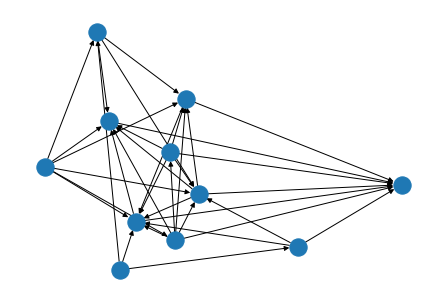

In [148]:
g = nx.drawing.nx_pydot.from_pydot(graphs[0])
nx.draw(g)

In [159]:
print(np.array(nx.adjacency_matrix(g).todense()))
utils.count_accuracy(B_true, np.array(nx.adjacency_matrix(g).todense()))

[[0 1 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 1 0 1 0 1 0]
 [0 1 0 1 1 1 0 1 0 1 0]
 [0 1 0 0 1 1 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [1 1 1 0 1 1 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0]
 [0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0]]


{'fdr': 0.7428571428571429,
 'tpr': 0.5,
 'fpr': 0.7027027027027027,
 'shd': 33,
 'nnz': 35}